# Selecting glaciers in a shapefile, selecting data, running OGGM for a list of glaciers

In this notebook we will:
- show how to select glaciers in a basin using a shapefile
- show how to use published runoff data for this basin
- use OGGM on a list of glaciers

In [1]:
import geopandas as gpd

In [2]:
import xarray as xr
import salem
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook') 

In [4]:
import oggm.cfg
from oggm import utils, workflow, tasks, graphics

In [5]:
# OGGM options
oggm.cfg.initialize(logging_level='WARNING')

2023-03-22 18:21:39: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2023-03-22 18:21:39: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2023-03-22 18:21:39: oggm.cfg: Multiprocessing: using all available processors (N=8)
|  -1.0 B Elapsed Time: 0:00:04                                                


## Reading the RGI file

RGI can be downloaded freely. In OGGM we offer to read them for you:

In [6]:
from oggm import utils
rgi_file = utils.get_rgi_region_file(14, version='62')  # This is East Asia

In [7]:
# Read it
rgi_df = gpd.read_file(rgi_file)

In [8]:
f"The region has {len(rgi_df)} glaciers and an area of {rgi_df['Area'].sum()}km2"

'The region has 27988 glaciers and an area of 33568.298km2'

## Selecting glaciers in a basin 

This file can be downloaded [here](https://github.com/OGGM/training-lahore/raw/main/docs/day_5/Astore.zip) and added to the folder of the notebook.

In [9]:
fpath = 'zip://Astore.zip/Astore'
basin_df = gpd.read_file(fpath)

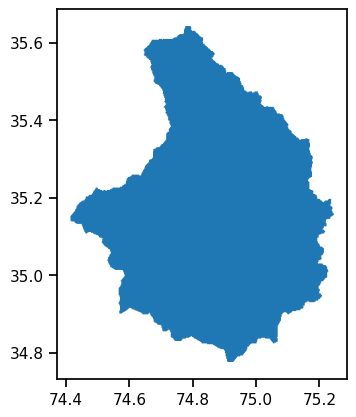

In [10]:
basin_df.plot();

We can select all glaciers within this shape by using their center point:

In [11]:
import shapely.geometry as shpg
in_basin = [basin_df.geometry.contains(shpg.Point(x, y))[0] for (x, y) in zip(rgi_df.CenLon, rgi_df.CenLat)]
rgi_df_sel = rgi_df.loc[in_basin]

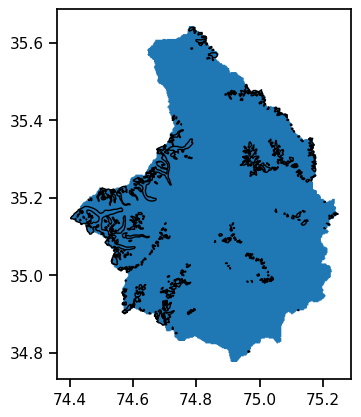

In [12]:
ax = basin_df.plot();
rgi_df_sel.plot(ax=ax, edgecolor='k');

In [13]:
f"The Astore region has {len(rgi_df_sel)} glaciers and an area of {rgi_df_sel['Area'].sum():.2f} km2"

'The Astore region has 357 glaciers and an area of 256.53 km2'

## Optional: fancy plot 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
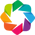

In [14]:
# One interactive plot below requires Bokeh
# The rest of the notebook works without this dependency - comment if needed
import holoviews as hv
hv.extension('bokeh')
import geoviews as gv
import geoviews.tile_sources as gts

In [15]:
(gv.Polygons(rgi_df_sel[['geometry']]).opts(fill_color=None, color_index=None) * gts.tile_sources['EsriImagery'] * 
 gts.tile_sources['StamenLabels']).opts(width=750, height=500, active_tools=['pan', 'wheel_zoom'])

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .WMTS.II    :WMTS   [Longitude,Latitude]

## Read the Rounce et al. (2023) projections and select the data 

These data are provided by [Rounce et al., 2023](https://www.science.org/doi/10.1126/science.abo1324) ([download](https://www.cmu.edu/cee/people/faculty/rounce.html)). The whole global dataset is available here: https://nsidc.org/data/hma2_ggp/versions/1 

We prepared data for the entire Indus basin for you. You can download them in different selections here: https://cluster.klima.uni-bremen.de/~fmaussion/share/world_basins/rounce_data 

Here we illustrate how to select data for Astore out of the much larger Indus file, which contains more than 25k glaciers!

In [16]:
import xarray as xr

# Take the data as numpy array
rgi_ids = rgi_df_sel['RGIId'].values

# This path works on classroom.oggm.org! To do the same locally download the data and open it from there
# path = '/home/www/fmaussion/share/world_basins/rounce_data/Indus/runoff_rounce_INDUS_ssp126_monthly.nc'
# If you work elsewhere, you can use this:
path = utils.file_downloader('https://cluster.klima.uni-bremen.de/~fmaussion/share/world_basins/rounce_data/Indus/runoff_rounce_INDUS_ssp126_monthly.nc')

# This might take a minute, as it extracts data from a large file
# Sometimes a random HDF error occurs on classroom - I'm not sure why...
with xr.open_dataset(path) as ds:
    # This selects the 357 glaciers out of many thousands
    ds_rounce_ssp126 = ds.sel(rgi_id=rgi_ids).load()

100% of   2.5 GiB |######################| Elapsed Time: 0:08:36 Time:  0:08:36


Let's have a look at the data now:

In [17]:
ds_rounce_ssp126

<xarray.Dataset>
Dimensions:                    (time: 1212, rgi_id: 357, gcm: 12)
Coordinates:
  * time                       (time) datetime64[ns] 2000-01-01 ... 2100-12-01
  * rgi_id                     (rgi_id) object 'RGI60-14.19043' ... 'RGI60-14...
  * gcm                        (gcm) object 'BCC-CSM2-MR' ... 'NorESM2-MM'
    ssp                        <U6 'ssp126'
Data variables:
    glac_runoff_fixed_monthly  (gcm, rgi_id, time) float64 0.0 0.0 ... 0.0 0.0

We can see that all GCMS and all RGI IDs are available in the file as dimensions (see also [this OGGM tutorial](https://oggm.org/tutorials/stable/notebooks/advanced/merge_gcm_runs_and_visualize.html)). We could, for example, select one glacier and plot all GCMs:

In [18]:
glacier = ds_rounce_ssp126.sel(rgi_id='RGI60-14.20157').glac_runoff_fixed_monthly
glacier_annual_sum = glacier.resample(time='AS').sum()
glacier_monthly_runoff = glacier.groupby(glacier['time.month']).mean()

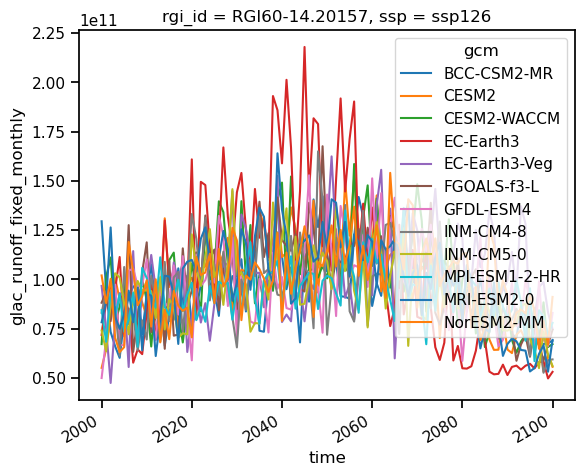

In [19]:
glacier_annual_sum.plot(hue='gcm');

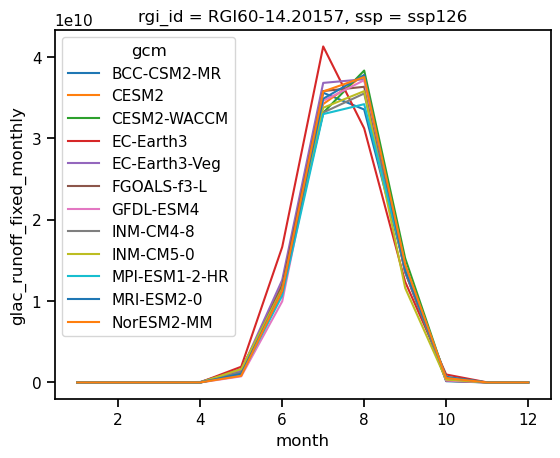

In [20]:
glacier_monthly_runoff.plot(hue='gcm');

Or one can select all glaciers but average over the GCMS:

In [21]:
all_glaciers_gcm_avg = ds_rounce_ssp126.glac_runoff_fixed_monthly.sum(dim='rgi_id').mean(dim='gcm')
all_glaciers_gcm_avg_annual = all_glaciers_gcm_avg.resample(time='AS').sum()
all_glaciers_gcm_avg_monthly_runoff = all_glaciers_gcm_avg.groupby(all_glaciers_gcm_avg['time.month']).mean()

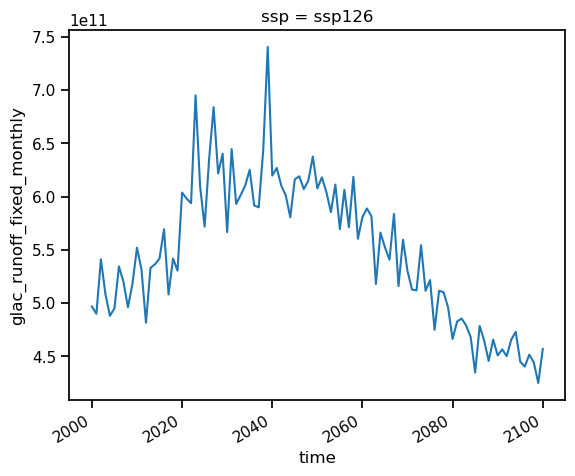

In [22]:
all_glaciers_gcm_avg_annual.plot();

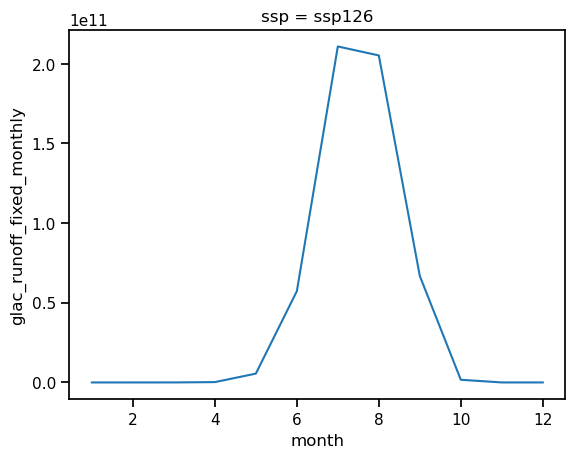

In [23]:
all_glaciers_gcm_avg_monthly_runoff.plot();

## Running OGGM for a list of glaciers 

357 glaciers might take too much time to run on classroom! So we select only the largest glaciers here:

In [24]:
rgi_df_sel_more = rgi_df_sel.loc[rgi_df_sel['Area'] > 5]
len(rgi_df_sel_more)

7

In [25]:
# OGGM options
oggm.cfg.initialize(logging_level='WARNING')
oggm.cfg.PATHS['working_dir'] = 'WaterResources-Proj-Astore'
oggm.cfg.PARAMS['store_model_geometry'] = True
oggm.cfg.PARAMS['dl_verify'] = False
oggm.cfg.PARAMS['use_multiprocessing'] = True  # Important!

2023-03-22 18:30:49: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2023-03-22 18:30:49: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2023-03-22 18:30:49: oggm.cfg: Multiprocessing: using all available processors (N=8)
2023-03-22 18:30:49: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.
2023-03-22 18:30:49: oggm.cfg: Multiprocessing switched ON after user settings.


In [26]:
base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.1/elev_bands/W5E5_spinup'
gdirs = workflow.init_glacier_directories(rgi_df_sel_more, from_prepro_level=5, prepro_border=160, prepro_base_url=base_url)

2023-03-22 18:30:49: oggm.workflow: init_glacier_directories from prepro level 5 on 7 glaciers.
2023-03-22 18:30:49: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 7 glaciers
100% of  73.1 MiB |######################| Elapsed Time: 0:00:14 Time:  0:00:14
100% of  74.8 MiB |######################| Elapsed Time: 0:00:14 Time:  0:00:14


`gdirs` now contain 7 glaciers

In [27]:
len(gdirs)

7

### Climate projections data

Before we run our future simulation we have to process the climate data for the glacier. We are using the bias-corrected projections from the Inter-Sectoral Impact Model Intercomparison Project ([ISIMIP](https://www.isimip.org)). They are offering climate projections from CMIP6 (the basis for the IPCC AR6) but already bias-corrected to our glacier grid point. Let's download them:

In [28]:
# you can choose one of these 5 different GCMs:
# 'gfdl-esm4_r1i1p1f1', 'mpi-esm1-2-hr_r1i1p1f1', 'mri-esm2-0_r1i1p1f1' ("low sensitivity" models, within typical ranges from AR6)
# 'ipsl-cm6a-lr_r1i1p1f1', 'ukesm1-0-ll_r1i1p1f2' ("hotter" models, especially ukesm1-0-ll)
from oggm.shop import gcm_climate
member = 'mri-esm2-0_r1i1p1f1' 

# Download the three main SSPs
for ssp in ['ssp126', 'ssp370','ssp585']:
    # bias correct them
    workflow.execute_entity_task(gcm_climate.process_monthly_isimip_data, gdirs, 
                                 ssp = ssp,
                                 # gcm member -> you can choose another one
                                 member=member,
                                 # recognize the climate file for later
                                 output_filesuffix=f'_ISIMIP3b_{member}_{ssp}'
                                 );

2023-03-22 18:31:20: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 7 glaciers
2023-03-22 18:31:22: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 7 glaciers
2023-03-22 18:31:24: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 7 glaciers


### Projection run

With the climate data download complete, we can run the forced simulations:

In [29]:
for ssp in ['ssp126', 'ssp370', 'ssp585']:
    rid = f'_ISIMIP3b_{member}_{ssp}'
    workflow.execute_entity_task(tasks.run_with_hydro, gdirs,
                             run_task=tasks.run_from_climate_data, ys=2020,
                             # use gcm_data, not climate_historical
                             climate_filename='gcm_data',
                             # use the chosen scenario
                             climate_input_filesuffix=rid,
                             # this is important! Start from 2020 glacier
                             init_model_filesuffix='_spinup_historical',
                             # recognize the run for later
                             output_filesuffix=rid,
                             # add monthly diagnostics
                             store_monthly_hydro=True);

2023-03-22 18:31:26: oggm.workflow: Execute entity tasks [run_with_hydro] on 7 glaciers
2023-03-22 18:31:27: oggm.workflow: Execute entity tasks [run_with_hydro] on 7 glaciers
2023-03-22 18:31:29: oggm.workflow: Execute entity tasks [run_with_hydro] on 7 glaciers


### Combine the data 

For this we use the OGGM utility functions `compile_*`:

In [30]:
ds_historical = utils.compile_run_output(gdirs, input_filesuffix='_spinup_historical')

2023-03-22 18:31:30: oggm.utils: Applying global task compile_run_output on 7 glaciers
2023-03-22 18:31:30: oggm.utils: Applying compile_run_output on 7 gdirs.


In [31]:
ssp = 'ssp126'
ds_oggm_ssp126 = utils.compile_run_output(gdirs, input_filesuffix=f'_ISIMIP3b_{member}_{ssp}')
ssp = 'ssp370'
ds_oggm_ssp370 = utils.compile_run_output(gdirs, input_filesuffix=f'_ISIMIP3b_{member}_{ssp}')
ssp = 'ssp585'
ds_oggm_ssp585 = utils.compile_run_output(gdirs, input_filesuffix=f'_ISIMIP3b_{member}_{ssp}')

2023-03-22 18:31:30: oggm.utils: Applying global task compile_run_output on 7 glaciers
2023-03-22 18:31:30: oggm.utils: Applying compile_run_output on 7 gdirs.
2023-03-22 18:31:30: oggm.utils: Applying global task compile_run_output on 7 glaciers
2023-03-22 18:31:30: oggm.utils: Applying compile_run_output on 7 gdirs.
2023-03-22 18:31:31: oggm.utils: Applying global task compile_run_output on 7 glaciers
2023-03-22 18:31:31: oggm.utils: Applying compile_run_output on 7 gdirs.


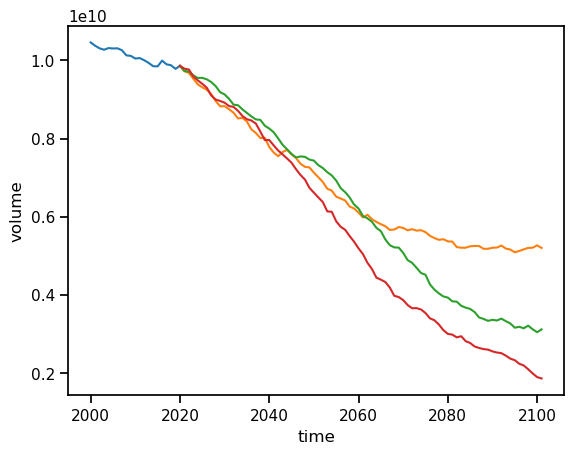

In [32]:
ds_historical.volume.sum(dim='rgi_id').sel(time=slice('2000', '2021')).plot();
ds_oggm_ssp126.volume.sum(dim='rgi_id').plot();
ds_oggm_ssp370.volume.sum(dim='rgi_id').plot();
ds_oggm_ssp585.volume.sum(dim='rgi_id').plot();

### Plot the hydrological output 

2023-03-22 18:31:31: oggm.utils: Applying global task compile_run_output on 7 glaciers
2023-03-22 18:31:31: oggm.utils: Applying compile_run_output on 7 gdirs.
2023-03-22 18:31:31: oggm.utils: Applying global task compile_run_output on 7 glaciers
2023-03-22 18:31:31: oggm.utils: Applying compile_run_output on 7 gdirs.
2023-03-22 18:31:31: oggm.utils: Applying global task compile_run_output on 7 glaciers
2023-03-22 18:31:31: oggm.utils: Applying compile_run_output on 7 gdirs.


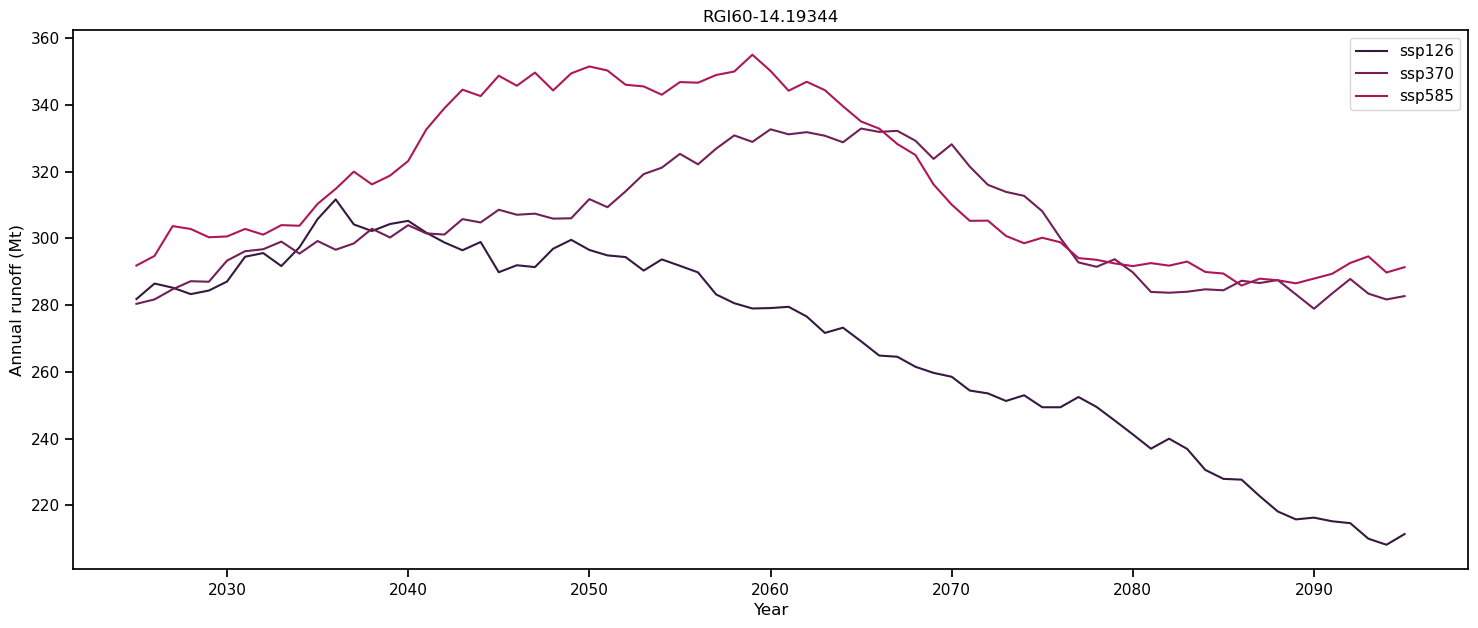

In [33]:
# Create the figure
f, ax = plt.subplots(figsize=(18, 7), sharex=True)
# Loop over all scenarios
for i, ssp in enumerate(['ssp126', 'ssp370', 'ssp585']):
    file_id = f'_ISIMIP3b_{member}_{ssp}'
    
    # This repeats the step above but hey
    ds = utils.compile_run_output(gdirs, input_filesuffix=f'_ISIMIP3b_{member}_{ssp}')
    ds = ds.sum(dim='rgi_id').isel(time=slice(0, -1))
        
    # Select annual variables
    sel_vars = [v for v in ds.variables if 'month_2d' not in ds[v].dims]
    # And create a dataframe
    df_annual = ds[sel_vars].to_dataframe()

    # Select the variables relevant for runoff.
    runoff_vars = ['melt_off_glacier', 'melt_on_glacier', 
                   'liq_prcp_off_glacier', 'liq_prcp_on_glacier']
    # Convert to mega tonnes instead of kg.
    df_runoff = df_annual[runoff_vars].clip(0) * 1e-9
    # Sum the variables each year "axis=1", take the 11 year rolling mean and plot it.
    df_roll = df_runoff.sum(axis=1).rolling(window=11, center=True).mean()
    df_roll.plot(ax=ax, label=ssp, color=sns.color_palette("rocket")[i])

ax.set_ylabel('Annual runoff (Mt)'); ax.set_xlabel('Year'); plt.title(gdirs[0].rgi_id); plt.legend();

## Let's compare Rounce et al. (2023) data and OGGM for these 7 selected glaciers, GCM and SSP

OGGM first:

In [1]:
# Select the variables relevant for runoff.
runoff_vars = ['melt_off_glacier', 'melt_on_glacier', 
               'liq_prcp_off_glacier', 'liq_prcp_on_glacier']
# And create a dataframe
df_annual = ds_oggm_ssp126[sel_vars].sum(dim='rgi_id').isel(time=slice(0, -1)).to_dataframe()

# Select the variables relevant for runoff.
runoff_vars = ['melt_off_glacier', 'melt_on_glacier', 
               'liq_prcp_off_glacier', 'liq_prcp_on_glacier']
# Convert to mega tonnes instead of kg.
df_runoff = df_annual[runoff_vars].clip(0) * 1e-9

NameError: name 'ds_oggm_ssp126' is not defined

Then Rounce:

In [35]:
ds_rounce_ssp126_sel = ds_rounce_ssp126.sel(rgi_id=ds_oggm_ssp126.rgi_id, gcm='MRI-ESM2-0')
ds_rounce_ssp126_sel = ds_rounce_ssp126_sel.glac_runoff_fixed_monthly.sum(dim='rgi_id').resample(time='AS').sum() * 1e-9
ds_rounce_ssp126_sel['time'] = ds_rounce_ssp126_sel['time.year'] 

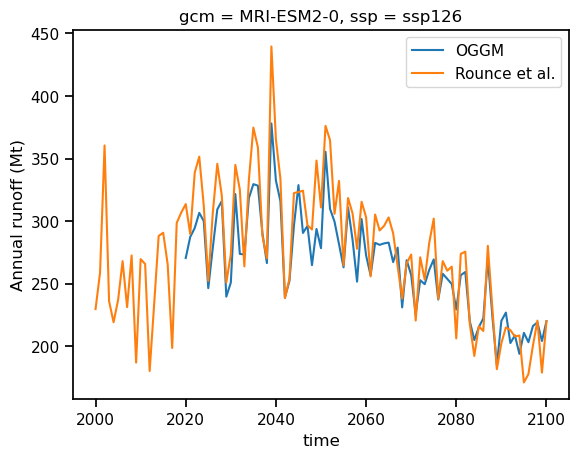

In [36]:
df_runoff.sum(axis=1).plot(label='OGGM');
ds_rounce_ssp126_sel.plot(label='Rounce et al.');
plt.ylabel('Annual runoff (Mt)'); plt.legend();

That's very close! Often the projections are not so close though.